### Random Forests on Iris Multi-Class Classification Problem

Previous example: [/examples/datasets_misc.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/datasets_misc.ipynb)  
Next example: [/examples/shallow/pca_and_svm.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/shallow/pca_and_svm.ipynb)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


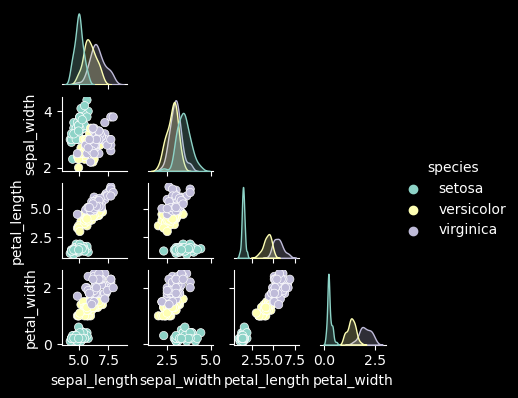

In [5]:
plt.style.use('dark_background')
sns.pairplot(iris, hue='species', corner=True, height=1)

In [6]:
def print_data(msg, data): print(f'{msg:25}: {data.shape}')
X_train, X_test, y_train, y_test = train_test_split(iris.drop('species', axis=1), iris['species'], random_state=1, test_size=0.33)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print_data('X_train', X_train)
print_data('y_train', y_train)
print_data('X_test', X_test)
print_data('y_test', y_test)

X_train                  : (100, 4)
y_train                  : (100,)
X_test                   : (50, 4)
y_test                   : (50,)


In [7]:
model = RandomForestClassifier()
y_train_pred_before = model.predict(X_train)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [8]:
def disp_results(func, gt, pred, msg): print(f'{func.__name__} of {msg}:\n{func(gt, pred)}')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
disp_results(classification_report, y_train, y_train_pred, 'training data')
disp_results(confusion_matrix, y_train, y_train_pred, 'training data')
print()
disp_results(classification_report, y_test, y_test_pred, 'test data')
disp_results(confusion_matrix, y_test, y_test_pred, 'test data')

classification_report of training data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        33
  versicolor       1.00      1.00      1.00        31
   virginica       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

confusion_matrix of training data:
[[33  0  0]
 [ 0 31  0]
 [ 0  0 36]]

classification_report of test data:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

confusion_matrix of test data:
[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]


Previous example: [/examples/datasets_misc.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/datasets_misc.ipynb)  
Next example: [/examples/shallow/pca_and_svm.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/shallow/pca_and_svm.ipynb)